# **CNN MODEL**

In [ ]:
import keras
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt 
from keras.preprocessing import image
import PIL
from keras.callbacks import EarlyStopping
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




**Data Agumentaion and Preprocessing**



In [2]:
from keras.preprocessing.image import ImageDataGenerator

# turn photo to array of pixels
train_datagen=ImageDataGenerator(rescale = 1./255,
                                 rotation_range = 40, 
                                 width_shift_range = 0.2, 
                                  height_shift_range = 0.2, 
                                 shear_range = 0.2, zoom_range = 0.2, 
                                 horizontal_flip = True,
                                 fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
train_path='/content/drive/MyDrive/Dataset-Skin/train'
test_path='/content/drive/MyDrive/Dataset-Skin/val'

In [7]:
train_data= train_datagen.flow_from_directory(train_path,
                target_size=(224,244),batch_size=32,class_mode='categorical',shuffle=False)
test_data= test_datagen.flow_from_directory(test_path,
                target_size=(224,244),batch_size=32,class_mode='categorical',shuffle=False)

Found 9203 images belonging to 5 classes.
Found 3455 images belonging to 5 classes.


In [8]:
train_data.class_indices

{'1. Eczema 1677': 0,
 '2. Melanoma 15.75k': 1,
 '3. Atopic Dermatitis - 1.25k': 2,
 '4. Basal Cell Carcinoma (BCC) 3323': 3,
 '7. Psoriasis pictures Lichen Planus and related diseases - 2k': 4}

**Define the Model**

In [ ]:
model = keras.Sequential()
    # The first two layers with 32 filters of window size 3x3
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224,244,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='tanh'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))

     
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 244, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 242, 32)      9248      
                                                                 
 average_pooling2d (AverageP  (None, 111, 121, 32)     0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 111, 121, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 119, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 117, 64)      36928     
                                                        

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adamax", metrics=['accuracy'])

In [ ]:
esults=model.fit( 
    train_data,  
    epochs=10,
    validation_data=test_data,steps_per_epoch=len(train_data),
    validation_steps=len(test_data),
    callbacks=tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
  )

Epoch 1/10
252/252 [==============================] - 217s 858ms/step - loss: 0.6594 - accuracy: 0.7135 - val_loss: 0.6447 - val_accuracy: 0.7299
Epoch 2/10
252/252 [==============================] - 215s 852ms/step - loss: 0.6378 - accuracy: 0.7158 - val_loss: 0.6108 - val_accuracy: 0.7385
Epoch 3/10
252/252 [==============================] - 224s 891ms/step - loss: 0.6575 - accuracy: 0.7028 - val_loss: 0.6084 - val_accuracy: 0.7290
Epoch 4/10
252/252 [==============================] - 220s 874ms/step - loss: 0.6394 - accuracy: 0.7176 - val_loss: 0.6767 - val_accuracy: 0.7100
Epoch 5/10
252/252 [==============================] - 221s 878ms/step - loss: 0.6409 - accuracy: 0.7151 - val_loss: 0.6098 - val_accuracy: 0.7264
Epoch 6/10
252/252 [==============================] - 223s 884ms/step - loss: 0.6461 - accuracy: 0.7152 - val_loss: 0.6148 - val_accuracy: 0.7212


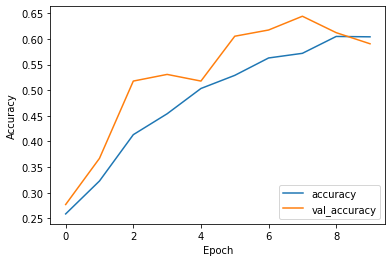

In [ ]:
plt.plot(esults.history['accuracy'], label='accuracy')
plt.plot(esults.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')